## Regressão Linear com 1 variável

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gradientDescent(X, y, theta, learning_rate=1e-3, maxit=10000):  
    sqrError = 0
    m = len(y) #numero de linhas do dataset
    
    for i in range(maxit):
        #h(x) = theta1*x1 + theta0 (y = ax + b) 
        hypothesis = np.dot(X, theta)
                        
                  #obtido - esperado
        errors = (hypothesis - y)
        
        sqrError += (errors**2).sum()
        sqrError /= m
        
        #10 primeiros e os 10 ultimos erros quadráticos
        if ((i <= 10) or (i >= 9990)):
            print("Erro quadrático:", sqrError)
        
        #Atualização dos thetas
        for n in range(len(theta)):
            theta[n] = theta[n] - (learning_rate * 1/m * errors).transpose() @ X[:, n]        
    
    print("Convergiu!")
    print("Thetas treinados:", theta[0], theta[1])
    return theta
    
    #X == matriz 97,2
    #y == matriz 97,1
    #hypothesis == matriz 97,1
    #errors == matriz 97,1 (cada linha é um erro)
    #sqrError == escalar
    #theta == matriz 2,1

Erro quadrático: 64.1454677549
Erro quadrático: 56.5565329757
Erro quadrático: 49.5288557786
Erro quadrático: 43.602635505
Erro quadrático: 38.6106686463
Erro quadrático: 34.4057028063
Erro quadrático: 30.8636391929
Erro quadrático: 27.8799470529
Erro quadrático: 25.3665787284
Erro quadrático: 23.2493705002
Erro quadrático: 21.465853276
Erro quadrático: 9.12651013147
Erro quadrático: 9.12648154591
Erro quadrático: 9.12645297065
Erro quadrático: 9.12642440569
Erro quadrático: 9.12639585103
Erro quadrático: 9.12636730666
Erro quadrático: 9.12633877259
Erro quadrático: 9.1263102488
Erro quadrático: 9.12628173529
Erro quadrático: 9.12625323206
Convergiu!
Thetas treinados: [-3.24044334] [ 1.12719788]


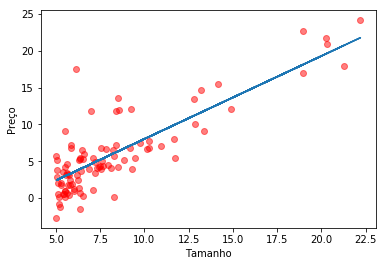

In [3]:
data = np.genfromtxt('ex1data1.txt', delimiter=',')

#Adicionando uma coluna de 1s no dataset
data = np.column_stack([np.ones((97,1)), data])

#thetas iniciais
theta = np.array([0.0, 0.0]).reshape(-1,1)

X = data[:,0:2].reshape(97,2)
y = data[:,2].reshape(97,1)

trained_theta = trained_thetas = gradientDescent(X, y, theta)

#Todos os pontos do dataset
plt.scatter(X[:,1], y, color='r', alpha=0.5)

#Hipótese final
plt.plot(X[:,1], X @ trained_theta)

plt.xlabel("Tamanho")
plt.ylabel("Preço")
plt.show()